In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# a. Loading and preprocessing the image data 
with np.load(r"mnist_dataset.npz") as data:
    x_train = data["X_train"]
    y_train = data["y_train"]
    x_test = data["X_test"]
    y_test = data["y_test"]

print("Loaded dataset successfully!")

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

Loaded dataset successfully!


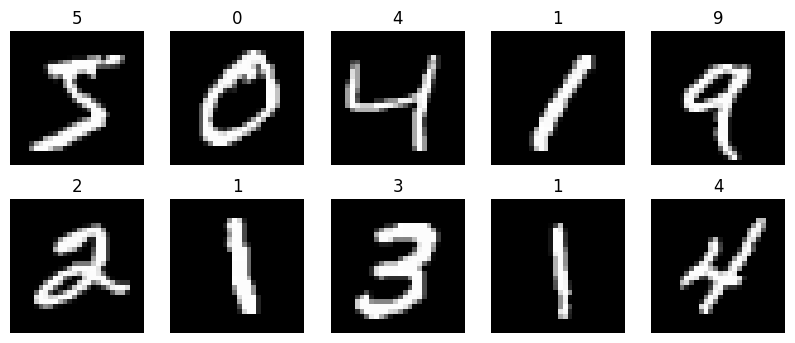

In [3]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap = "grey")
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

In [4]:
# b. Defining the model’s architecture 
model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(100, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

C:\Users\Yash\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# c. Training the model 
model.compile(
    optimizer = "sgd",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [6]:
model.fit(x_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8736 - loss: 0.4574 
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9347 - loss: 0.2208
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9511 - loss: 0.1685
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9592 - loss: 0.1372
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9649 - loss: 0.1175
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9696 - loss: 0.1035
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9718 - loss: 0.0920
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9748 - loss: 0.0835
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9767 - loss: 0.0763 
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9793 - loss: 0.0693


In [7]:
# d. Estimating the model’s performance
test_loss, test_acc = model.evaluate(x_test, y_test)
print("T accuracy: ", test_acc)
print("T loss: ", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9720 - loss: 0.0882
T accuracy:  0.972000002861023
T loss:  0.08817868679761887


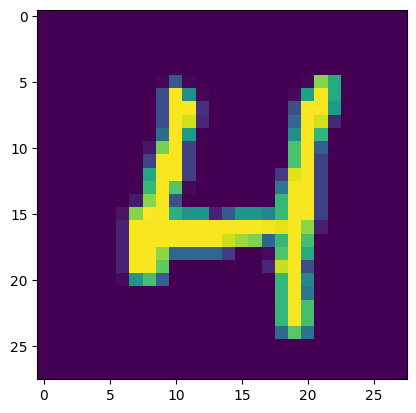

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
No in the image is:  4


In [8]:
n = np.random.randint(0, 9999)
plt.imshow(x_test[n])
plt.show()

predicted_value = model.predict(x_test)
print("No in the image is: ", np.argmax(predicted_value[n]))